### Import libraries and data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [24]:
np_df = pd.read_csv('../data/national_park_species.csv')
np_df = np_df.drop(np_df.columns[0], axis=1)
np_df.head()


,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",True,False,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",True,False,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


### Data pre processing

#### Encode categorical variables:

In [27]:
for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Abundance','Observations', 'GRank']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes

### Split and scale data

In [28]:
# Split data into X and y
X = np_df[['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat', 'Sensitive_cat', 'Nativeness_cat', 'Abundance_cat','Observations_cat', 'GRank_cat']]
y= np_df['ParkName_cat']

In [29]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [30]:
# Standardize the predictors
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN model

In [31]:
# Initialize KNN classiier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6049082796232028


### Visualize KNN results

In [33]:
def knn():

    k_values = [3, 5, 7, 9, 11]
    accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"K={k} - Accuracy: {accuracy:.3f}")
    
    # Task 2: Visualize the effect of K on accuracy
    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.title('KNN: Effect of K on Model Accuracy')
    plt.grid(True)
    plt.show()
    
    
    # Use the best K value
    best_k = k_values[np.argmax(accuracies)]
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)
    

K=3 - Accuracy: 0.595
K=5 - Accuracy: 0.605
K=7 - Accuracy: 0.600
K=9 - Accuracy: 0.602
K=11 - Accuracy: 0.598


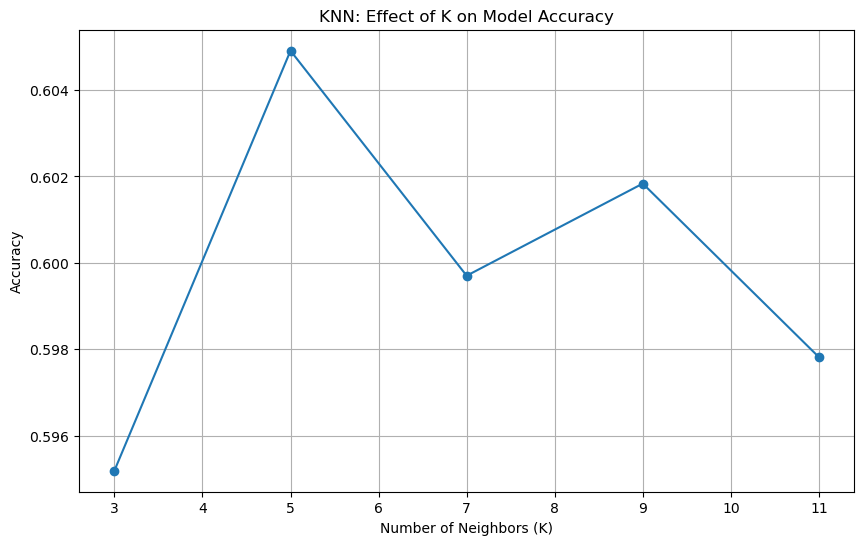

In [34]:
knn()

### Decision Tree Model

In [35]:
# Initialize Decision Tree classiier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6360932077342588


### Tune Model

In [37]:
def decision_tree():
    print("Exercise 1: Decision Trees\n")
    
    # Task 1: Try different max_depths and compare accuracy
    max_depths = [2, 3, 4, 5]
    accuracies = []
    
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt.fit(X_train_scaled, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Max Depth: {depth} - Accuracy: {accuracy:.3f}")
    


In [38]:
decision_tree()

Exercise 1: Decision Trees

Max Depth: 2 - Accuracy: 0.466
Max Depth: 3 - Accuracy: 0.497
Max Depth: 4 - Accuracy: 0.532
Max Depth: 5 - Accuracy: 0.547


### Visualize Model

In [39]:
# Task 2: Visualize the best performing tree
dt_best = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_best.fit(X_train_scaled, y_train)

# Create the mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt.classes_, np_df.ParkName.unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt.classes_]


plt.figure(figsize=(12, 15), dpi=700)
plot_tree(dt_best, feature_names=X.columns, class_names= class_names_str, 
          filled=True, rounded=True)
plt.title("Decision Tree Visualization (max_depth = 5)")
plt.savefig('decision_tree.png') 
plt.show()



In [41]:
# After fitting the tree
node_id = 0  # or whatever node ID you're looking at
print(dt.tree_.value[node_id])


# values are how many observations from each park were included in that node

[[ 1135.   859.  1295.  1676.  1813.  1533. 19297.  1342.  1680.  1544.
   1340.  2143.  2720.  1381.  1191.]]


### Find important features 

In [63]:
# Task 3: Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_best.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
            feature  importance
6    Nativeness_cat    0.703912
0  CategoryName_cat    0.120934
8  Observations_cat    0.090331
7     Abundance_cat    0.055679
1         Order_cat    0.010226
4       NPSTags_cat    0.009705
3         GRank_cat    0.008696
9         GRank_cat    0.000358
2        Family_cat    0.000158
5     Sensitive_cat    0.000000
